In [1]:
#Import Liabraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules


import warnings
warnings.filterwarnings("ignore")

In [5]:
# !pip install mlxtend plotly seaborn openpyxl

In [6]:
# Read the dataset
df =pd.read_excel(r"C:\Users\ASUS\OneDrive\Desktop\Market basket Analysis\Online Retail.xlsx")


In [7]:
# Check the dimensions of data
df.shape

(541909, 8)

In [8]:
#Check the first five rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#last five Rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [10]:
#Randomly sampling some Observations
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
286256,562024,23124,18PC WOODEN CUTLERY SET DISPOSABLE,1,2011-08-01 16:07:00,2.46,NaN,United Kingdom
400784,571372,79160,HEART SHAPE WIRELESS DOORBELL,1,2011-10-17 11:55:00,2.10,17201.0,United Kingdom
463549,576066,22197,POPCORN HOLDER,2,2011-11-13 15:44:00,0.85,16898.0,United Kingdom
459106,575867,21948,SET OF 6 CAKE CHOPSTICKS,1,2011-11-11 12:44:00,1.25,15034.0,United Kingdom
364908,568680,21755,LOVE BUILDING BLOCK WORD,6,2011-09-28 14:10:00,6.25,18265.0,United Kingdom


In [11]:
# check the dtypes of all the variables
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [12]:
# checkb for  missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
# Dropping the records where Description is not avilable
df.dropna(axis=0, subset=['Description'], inplace= True)

In [14]:
# check for the missing values again
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [15]:
# Import re library for regular expression
import re

# Remove extra white spaces in 'Description' Column
df['Description']= df['Description'].astype('str').apply(lambda x: re.sub(r'/\s+', ' ',x).strip())

In [16]:
# Let's sample some transaction that have been cancelled
df[df['InvoiceNo'].astype(str).str.contains('C')].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
383011,C569985,22625,RED KITCHEN SCALES,-2,2011-10-06 19:51:00,8.50,15365.0,United Kingdom
44894,C540243,22091,EMPIRE TISSUE BOX,-7,2011-01-05 15:32:00,1.25,12585.0,Germany
273294,C560818,22842,BISCUIT TIN VINTAGE RED,-1,2011-07-21 10:52:00,6.75,17811.0,United Kingdom
235942,C557663,21933,PINK VINTAGE PAISLEY PICNIC BAG,-10,2011-06-21 17:59:00,2.95,NaN,EIRE
111894,C545841,22728,ALARM CLOCK BAKELIKE PINK,-1,2011-03-07 13:36:00,3.75,17675.0,United Kingdom
337775,C566467,20719,WOODLAND CHARLOTTE BAG,-14,2011-09-12 18:04:00,0.85,14688.0,United Kingdom
52397,C540780,22423,REGENCY CAKESTAND 3 TIER,-23,2011-01-11 11:19:00,10.95,14299.0,United Kingdom
278549,C561212,21735,TWO DOOR CURIO CABINET,-1,2011-07-25 17:00:00,12.75,17175.0,United Kingdom
300950,C563224,23298,SPOTTY BUNTING,-1,2011-08-14 14:33:00,4.95,12409.0,Switzerland
172690,C551551,84600,NEW BAROQUE JEWELLERY BOX,-1,2011-05-03 10:08:00,7.95,17841.0,United Kingdom


In [17]:
# Variable defination suggest that IvoiceNo values containing 'C' Represent cancellations
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df =df[~df['InvoiceNo'].str.contains('C')]
print(df.shape)

(531167, 8)


In [18]:
print("Total number of countries: ",df['Country'].nunique(), end= "\n\n")
df['Country'].value_counts(normalize=True).head()

Total number of countries:  38



Country
United Kingdom    0.915283
Germany           0.017023
France            0.015829
EIRE              0.014862
Spain             0.004678
Name: proportion, dtype: float64

In [19]:
#Let's focus on one Geography i. e.Germany
grouped_df = (df[df['Country'] =="Germany"]
             .groupby(['InvoiceNo', 'Description'])
             .size()
             .unstack()
             .fillna(0)
             .reset_index()
             .set_index('InvoiceNo'))

print(grouped_df.shape)
grouped_df.head()

(457, 1695)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
#All Positive values are to be converted to a 1 and anything less than 0 is set to 0
def custom_encoding(x):
    if x <=0:
        return 0
    if x >=1:
        return 1
    
grouped_df = grouped_df.applymap(custom_encoding)
grouped_df.drop('POSTAGE',inplace=True,axis=1)

In [21]:
frequent_itomsets = apriori(grouped_df, min_support=0.05, use_colnames=True)

In [22]:
rules = association_rules(frequent_itomsets,metric="confidence", min_threshold=0.6)

In [23]:
rules.sort_values(by= 'lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(RED RETROSPOT CHARLOTTE BAG),(WOODLAND CHARLOTTE BAG),0.070022,0.126915,0.059081,0.843750,6.648168,1.0,0.050194,5.587746,0.913551,0.428571,0.821037,0.654634
1,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,1.0,0.092679,4.529540,0.837922,0.483871,0.779227,0.684524
2,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,1.0,0.044817,2.365427,0.713415,0.251969,0.577243,0.483283


In [24]:
df.Country

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 531167, dtype: object

In [25]:
#Let's split up this line of code, we first count the occurances of each item in the dataset, then sort the value in asending order and filter out the first 10 items, this would be the top 10 selling items
x = df['Description'].value_counts().sort_values(ascending=False)[:10]

print("Top 10 frequently sold products")

fig = px.bar(x= x.index, y= x.values)
fig.update_layout(title_text= "Top 10 frequently sold products ", xaxis_title= "Products", yaxis_title="Number of item sold")
fig.show()

Top 10 frequently sold products


In [26]:
#Now let's look at the 10 least selling products
#The only change in code would be to not sort the values in descending order

y = df['Description'].value_counts().sort_values(ascending=True)[:10]
print("10 least frequently sold products")

fig = px.bar(x= y.index, y= y.values)
fig.update_layout(title_text= "10 least frequently sold products ", xaxis_title= "Products", yaxis_title="Number of item sold")
fig.show()

10 least frequently sold products


In [27]:
# #Let's create few new column by modifying the date column in the dataframe

# #Filtering out the year value from the date by splitting the date on - which gives a list and then taking out the last value which is the year value
# df["Year"] = df['InvoiceDate'].str.split("-").str[-1]

# #Creating a new column in Month-Year format by splitting the date by - and filtering out the second and last value from the list which belongs to month and year respectively
# df["Month-Year"] = df['InvoiceDate'].str.split("-").str[1] + "-" + df['InvoiceDate'].str.split("-").str[-1]

In [28]:
# #Plotting a bar graph with number of sales in each  month of each year
# fig1 = px.bar(df["Month-Year"].value_counts(ascending=False), 
#               orientation= "v", 
#               color = df["Month-Year"].value_counts(ascending=False),
              
#                labels={'value':'Count', 'index':'Date','color':'Meter'})

# fig1.update_layout(title_text="Exploring highest sales by  date")

# fig1.show()

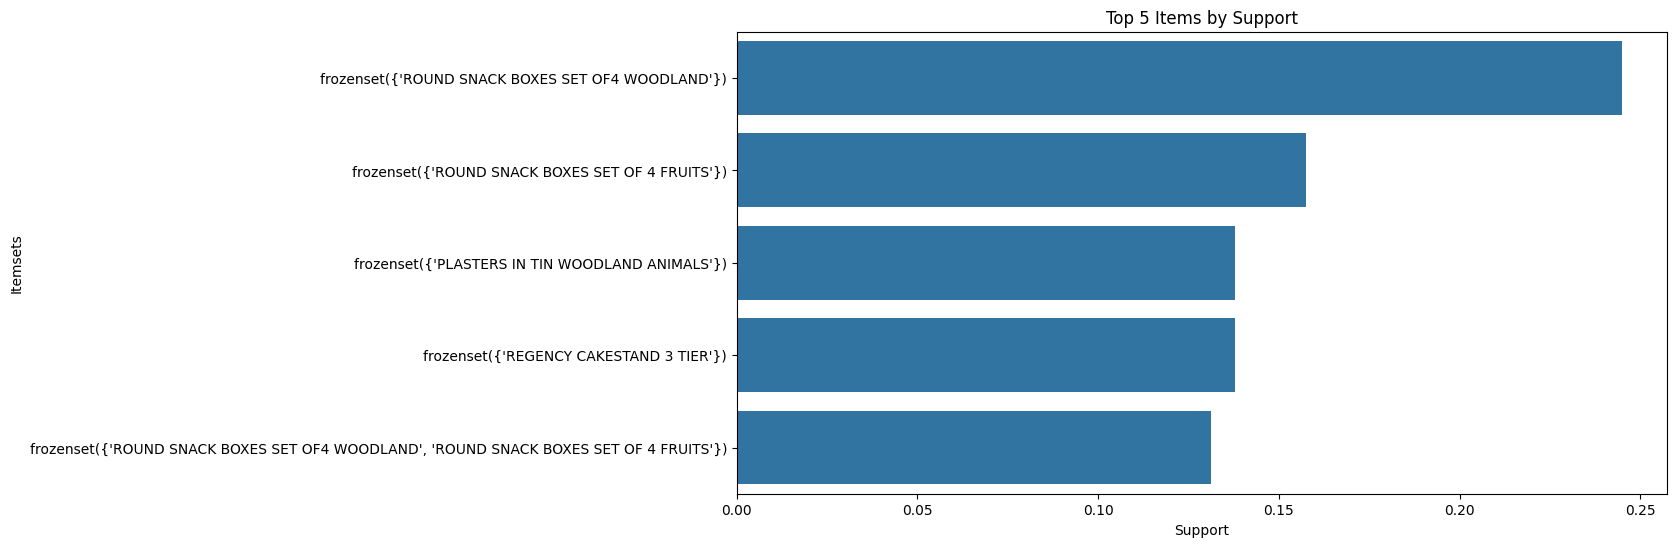

In [29]:
# Top 5 items with the highest support
top_items = frequent_itomsets.nlargest(5,'support')
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_items)
plt.title('Top 5 Items by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

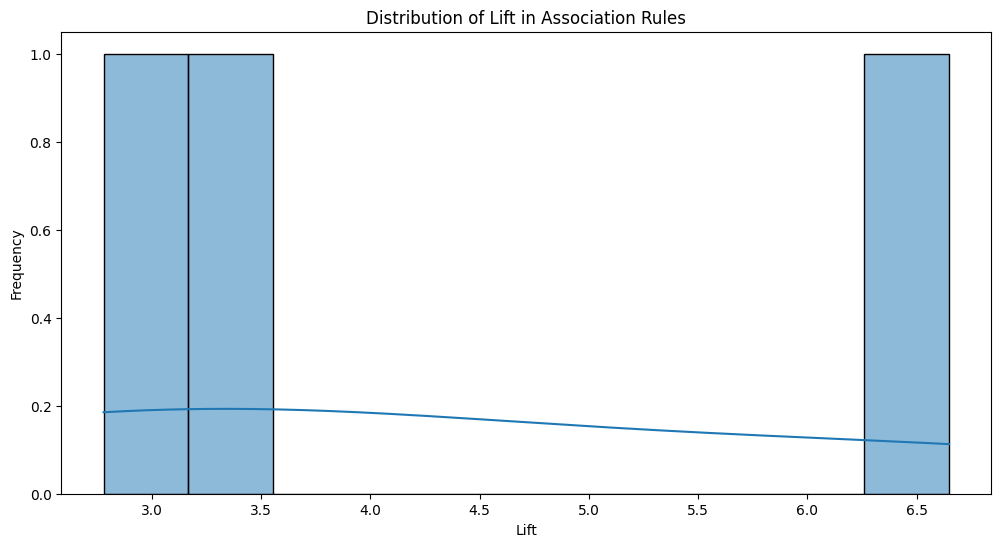

In [30]:
# Visualizing the distribution of lift
plt.figure(figsize=(12, 6))
sns.histplot(rules['lift'], bins=10, kde=True)
plt.title('Distribution of Lift in Association Rules')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.show()

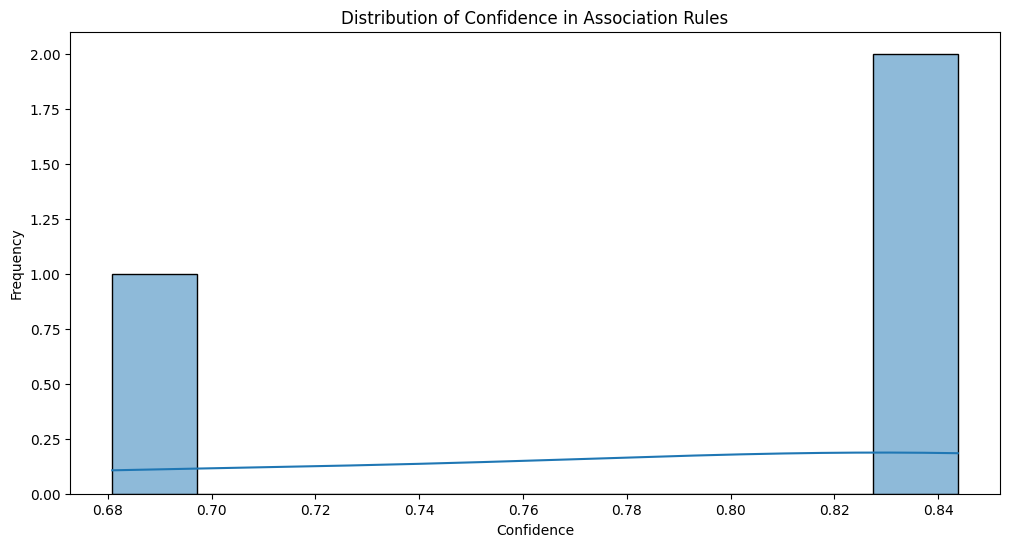

In [31]:
# Visualizing the distribution of confidence
plt.figure(figsize=(12, 6))
sns.histplot(rules['confidence'], bins=10, kde=True)
plt.title('Distribution of Confidence in Association Rules')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

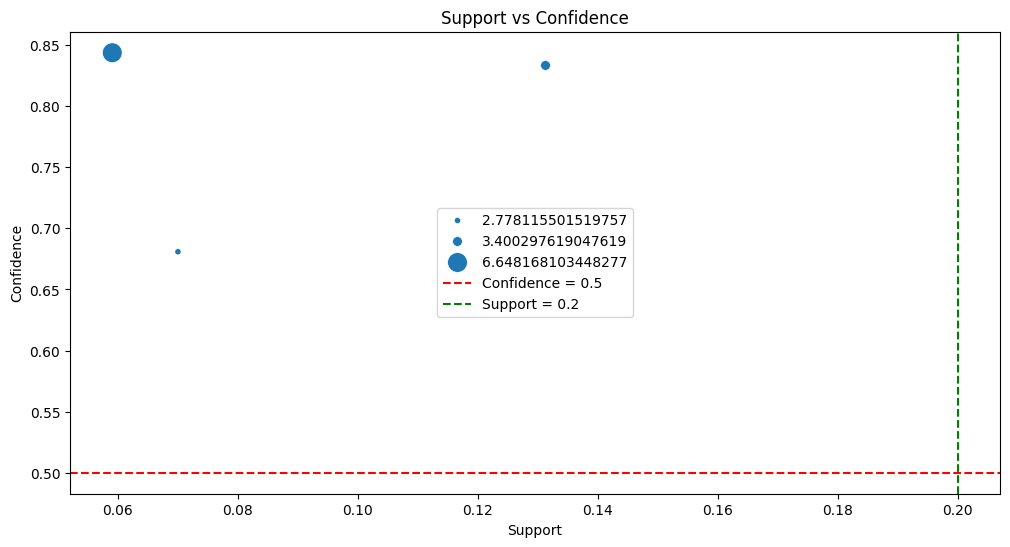

In [32]:
# Visualization of support vs confidence
plt.figure(figsize=(12, 6))
sns.scatterplot(x='support', y='confidence', size='lift', sizes=(20, 200), data=rules)
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.axhline(y=0.5, color='r', linestyle='--', label='Confidence = 0.5')
plt.axvline(x=0.2, color='g', linestyle='--', label='Support = 0.2')
plt.legend()
plt.show()

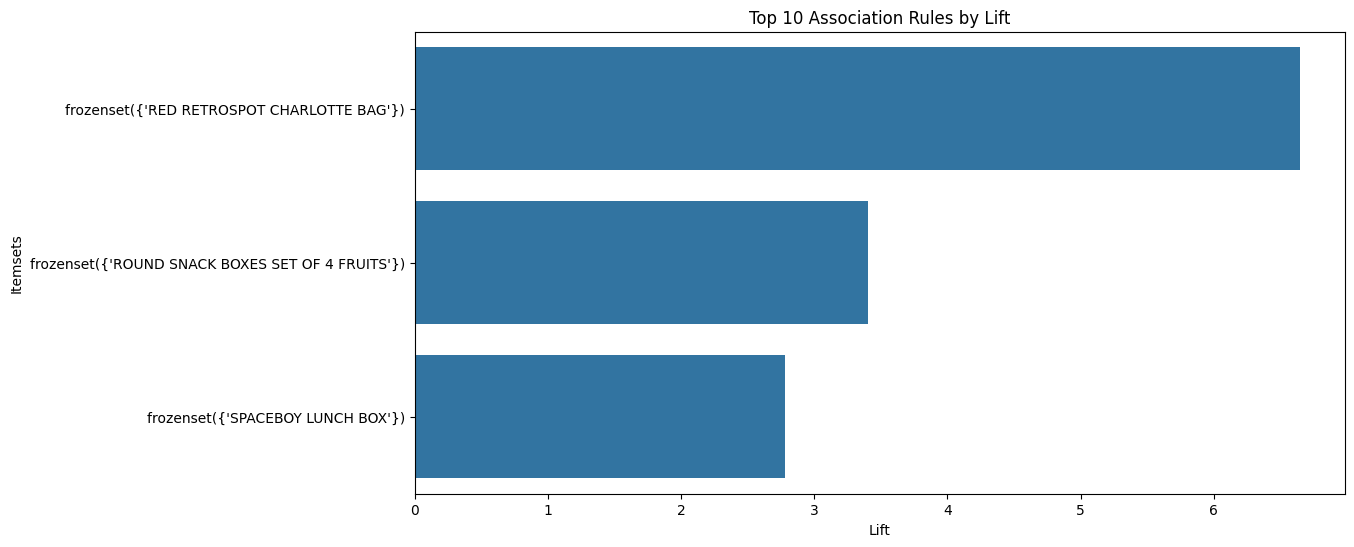

In [33]:
# Visualization of the top 10 rules based on lift
plt.figure(figsize=(12, 6))
top_rules = rules.sort_values('lift', ascending=False).head(10)
sns.barplot(x='lift', y='antecedents', data=top_rules)
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Itemsets')
plt.show()

In [ ]:
# # Heatmap of the support of itemsets
# plt.figure(figsize=(12, 8))
# support_matrix = grouped_df.corr()
# sns.heatmap(support_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Heatmap of Itemset Correlation')
# plt.show()